<a href="https://colab.research.google.com/github/harwarl/Pytorch/blob/main/Copy_of_Working_With_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pwd

'/content'

In [ ]:
data_path = '/content/'
cifar10 = datasets.CIFAR10(data_path, train = True, download = True)
cifar10_test = datasets.CIFAR10(data_path, train = False, download = True)

Extracting /content/cifar-10-python.tar.gz to /content/
Files already downloaded and verified


In [ ]:
cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/
    Split: Train

In [ ]:
cifar10_test

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /content/
    Split: Test

In [ ]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [ ]:
len(cifar10), len(cifar10_test)

(50000, 10000)

In [ ]:
### checking the image , label and class of an ikmage in cifar 10
img, label = cifar10[99]  ## gives the image in a PIL format
img, label

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA115A32CF8>, 1)

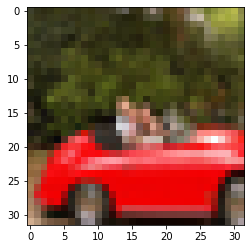

In [ ]:
plt.imshow(img, cmap = 'gray')  ## to show the image

In [ ]:
## since we can't work a pIL Image, we have to convert it to a tensor. Using transform from Torchvision

from torchvision import transforms

dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [ ]:
## to convert the image to Tensor
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
## putting it all together

tensor_cifar10 = datasets.CIFAR10(data_path, train = True, download = True, transform = transforms.ToTensor())
tensor_cifar10_test = datasets.CIFAR10(data_path, train = False, download = False, transform = transforms.ToTensor())

Files already downloaded and verified


In [ ]:
tensor_cifar10

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
img_t, _ = tensor_cifar10[99]
img_t.dtype

torch.float32

In [ ]:
img_t.shape

torch.Size([3, 32, 32])

In [ ]:
img_t.min(), img_t.max()  ## ToTensor(transforms) scales the data  to 0-1 range

(tensor(0.), tensor(1.))

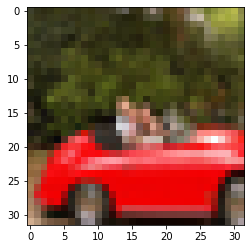

In [ ]:
## normal Image HxWxC

img = img_t.permute(1, 2, 0)
plt.imshow(img)

In [ ]:
###stacking all the tensors along a direction to normalize the data

imgs = torch.stack([img for img, _ in tensor_cifar10], dim = 3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [ ]:
print(imgs.view(3, -1).shape)
imgs.view(3, -1).mean(dim = 1)  # keeping the RGB channel

torch.Size([3, 51200000])


tensor([0.4914, 0.4822, 0.4465])

In [ ]:
imgs.view(3, -1).std(dim = 1)

tensor([0.2470, 0.2435, 0.2616])

In [ ]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [ ]:
normalize_cifar10 = datasets.CIFAR10(data_path, train = True, download = True, transform = transforms.Compose([
                                                                                                               transforms.ToTensor(),
                                                                                                               transforms.Normalize((0.4914, 0.4822, 0.4465), 
                                                                                                                                    (0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified


In [ ]:
img_t, _ = normalize_cifar10[99]

In [ ]:
img_t.shape

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


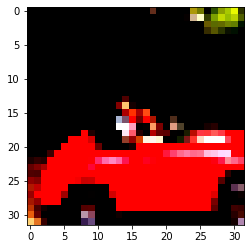

In [ ]:
img = img_t.permute(1, 2, 0)
plt.imshow(img)

***DIstinguishing Birds from Airplane***

In [ ]:
cifar10 = datasets.CIFAR10(data_path, train = True, download = True, transform = transforms.Compose([
                                                                                                               transforms.ToTensor(),
                                                                                                               transforms.Normalize((0.4914, 0.4822, 0.4465), 
                                                                                                                                    (0.2470, 0.2435, 0.2616))
]))

cifar10_val = datasets.CIFAR10(data_path, train = False, download = True, transform = transforms.Compose([
                                                                                                               transforms.ToTensor(),
                                                                                                               transforms.Normalize((0.4914, 0.4822, 0.4465), 
                                                                                                                                    (0.2470, 0.2435, 0.2616))
]))

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
label_map = {0: 0, 2:1}
class_names= ['aeroplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [ ]:
cifar10[2]

(tensor([[[ 2.0591,  2.0274,  2.0274,  ...,  2.0274,  2.0274,  2.0274],
          [ 2.0591,  2.0591,  2.0591,  ...,  2.0591,  2.0591,  2.0591],
          [ 2.0591,  2.0432,  2.0432,  ...,  2.0432,  2.0432,  2.0432],
          ...,
          [-0.1954, -0.2271, -0.3224,  ..., -0.8463, -0.8463, -0.8463],
          [-0.2271, -0.3383, -0.4177,  ..., -0.9099, -0.8781, -0.7511],
          [-0.3065, -0.4177, -0.4812,  ..., -0.7511, -0.7352, -0.7193]],
 
         [[ 2.1265,  2.0943,  2.0943,  ...,  2.0943,  2.0943,  2.0943],
          [ 2.1265,  2.1265,  2.1265,  ...,  2.1265,  2.1265,  2.1265],
          [ 2.1265,  2.1104,  2.1104,  ...,  2.1104,  2.1104,  2.1104],
          ...,
          [-0.0477, -0.0799, -0.1765,  ..., -0.6758, -0.6919, -0.6919],
          [-0.0799, -0.1926, -0.2732,  ..., -0.7724, -0.7563, -0.6275],
          [-0.1604, -0.2732, -0.3376,  ..., -0.6114, -0.6114, -0.5953]],
 
         [[ 2.1158,  2.0858,  2.0858,  ...,  2.0858,  2.0858,  2.0858],
          [ 2.1158,  2.1158,

In [ ]:
## softmax

def softmax(x):
  return torch.exp(x)/ torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])

softmax(x)


tensor([0.0900, 0.2447, 0.6652])

In [ ]:
x = torch.tensor([[1.0, 2.0, 3.0], 
                 [1.0, 2.0, 3.0]])

softmax = nn.Softmax(dim = 1)
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [ ]:
32 * 32 * 3

3072

In [ ]:
model = nn.Sequential(
    nn.Linear(3072, 512), 
    nn.Tanh(), 
    nn.Linear(512, 2), 
    nn.Softmax(dim = 1)
)

In [ ]:
model

Sequential(
  (0): Linear(in_features=3072, out_features=512, bias=True)
  (1): Tanh()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): Softmax(dim=1)
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


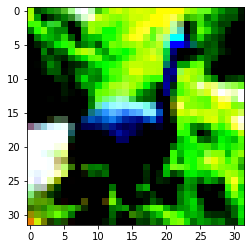

In [ ]:
img, _ = cifar2[0]
img = img.permute(1, 2, 0)
plt.imshow(img)

In [ ]:
img_batch = img.reshape(-1).unsqueeze(0)
img_batch.shape

torch.Size([1, 3072])

In [ ]:
out = model(img_batch)

In [ ]:
out

tensor([[0.5807, 0.4193]], grad_fn=<SoftmaxBackward>)

In [ ]:
_, index = torch.max(out, dim = 1)
index

tensor([0])

In [ ]:
class_names[index.item()]

'aeroplane'

In [ ]:
## using NLLLoss to keep track of our loss. It only takes in log probabilities as inputs. nn.LogSoftmax gives output in Logarithmic form

# aAdjusting the model
model = nn.Sequential(
    nn.Linear(3072, 512), 
    nn.Tanh(), 
    nn.Linear(512, 2), 
    nn.LogSoftmax(dim = 1)
)

loss = nn.NLLLoss()

In [ ]:
img, label = cifar2[0]
out = model(img.reshape(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.6470, grad_fn=<NllLossBackward>)

In [ ]:
import torch.optim as optim
model = nn.Sequential(
    nn.Linear(3072, 512), 
    nn.Tanh(), 
    nn.Linear(512, 2), 
    nn.LogSoftmax(dim = 1)
)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
n_epoch = 100
img, label = cifar2[0]
for epoch in range(1, n_epoch + 1):
  out = model(img.reshape(-1).unsqueeze(0))
  loss = loss_fn(out, torch.tensor([label]))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print(f"Epoch: {epoch}, Loss: {loss}")

Epoch: 1, Loss: 0.6738971471786499
Epoch: 2, Loss: 0.003167494898661971
Epoch: 3, Loss: 0.003072305815294385
Epoch: 4, Loss: 0.0029828124679625034
Epoch: 5, Loss: 0.002898422535508871
Epoch: 6, Loss: 0.0028187802527099848
Epoch: 7, Loss: 0.0027435303200036287
Epoch: 8, Loss: 0.0026723172049969435
Epoch: 9, Loss: 0.0026047846768051386
Epoch: 10, Loss: 0.002540576970204711
Epoch: 11, Loss: 0.002479576040059328
Epoch: 12, Loss: 0.002421425189822912
Epoch: 13, Loss: 0.0023660066071897745
Epoch: 14, Loss: 0.002313201315701008
Epoch: 15, Loss: 0.002262653084471822
Epoch: 16, Loss: 0.0022143623791635036
Epoch: 17, Loss: 0.002168091479688883
Epoch: 18, Loss: 0.002123840618878603
Epoch: 19, Loss: 0.002081372309476137
Epoch: 20, Loss: 0.002040567807853222
Epoch: 21, Loss: 0.00200130813755095
Epoch: 22, Loss: 0.001963593764230609
Epoch: 23, Loss: 0.0019273054786026478
Epoch: 24, Loss: 0.0018924438627436757
Epoch: 25, Loss: 0.0018587708473205566
Epoch: 26, Loss: 0.0018262865487486124
Epoch: 27, Lo

In [ ]:
##organizing data in  minibatches using torch.utils.data.DataLoader

train_loader = torch.utils.data.DataLoader(cifar2, batch_size= 64, shuffle = True)

In [ ]:
## DataLoader can be iterated over so it can be introduced in the training Loop

train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = True)
import torch.optim as optim
model = nn.Sequential(
    nn.Linear(3072, 512), 
    nn.Tanh(), 
    nn.Linear(512, 2), 
    nn.LogSoftmax(dim = 1)
)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
n_epoch = 100
for epoch in range(1, n_epoch + 1):
  for img, labels in train_loader:
    batch = img.shape[0]
    output = model(img.reshape(batch, -1))
    loss = loss_fn(output, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch: {epoch}, Loss: {loss}")

Epoch: 1, Loss: 0.35536646842956543
Epoch: 2, Loss: 0.8111211061477661
Epoch: 3, Loss: 0.3503064215183258
Epoch: 4, Loss: 0.2632753252983093
Epoch: 5, Loss: 0.635981023311615
Epoch: 6, Loss: 0.2528478801250458
Epoch: 7, Loss: 0.2738896310329437
Epoch: 8, Loss: 0.5266062617301941
Epoch: 9, Loss: 0.2725158631801605
Epoch: 10, Loss: 0.4207648038864136
Epoch: 11, Loss: 1.166111707687378
Epoch: 12, Loss: 0.5230740904808044
Epoch: 13, Loss: 0.5258932113647461
Epoch: 14, Loss: 0.23014208674430847
Epoch: 15, Loss: 0.3203120529651642
Epoch: 16, Loss: 0.6353141069412231
Epoch: 17, Loss: 0.265179842710495
Epoch: 18, Loss: 0.23890379071235657
Epoch: 19, Loss: 0.6417251229286194
Epoch: 20, Loss: 0.4833498001098633
Epoch: 21, Loss: 0.3073992133140564
Epoch: 22, Loss: 0.24093356728553772
Epoch: 23, Loss: 0.18009747564792633
Epoch: 24, Loss: 0.15768684446811676
Epoch: 25, Loss: 0.3952656090259552
Epoch: 26, Loss: 0.38173550367355347
Epoch: 27, Loss: 0.34982702136039734
Epoch: 28, Loss: 0.3005805909633

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 64, shuffle = False)

total  =0
correct = 0
with torch.no_grad():
  for imgs, labels in val_loader:
    batch = imgs.shape[0]
    outputs = model(imgs.view(batch, -1))
    _, predicted = torch.max(outputs, dim = 1)  ## returns valu and index of the max in the list
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

  print('Accuracy: %f' %(correct / total))

Accuracy: 0.814500


In [ ]:
correct

1629

In [ ]:
import torch.optim as optim
model = nn.Sequential(
    nn.Linear(3072, 1024), 
    nn.Tanh(), 
    nn.Linear(1024, 512),
    nn.Tanh(), 
    nn.Linear(512, 128),
    nn.Tanh(), 
    nn.Linear(128, 2),
    nn.LogSoftmax(dim = 1)
)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
n_epoch = 100
for epoch in range(1, n_epoch + 1):
  for img, labels in train_loader:
    batch = img.shape[0]
    output = model(img.reshape(batch, -1))
    loss = loss_fn(output, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch: {epoch}, Loss: {loss}")

Epoch: 1, Loss: 0.503502607345581
Epoch: 2, Loss: 0.46266308426856995
Epoch: 3, Loss: 0.3620375394821167
Epoch: 4, Loss: 0.28726404905319214
Epoch: 5, Loss: 0.5537788271903992
Epoch: 6, Loss: 0.20802733302116394
Epoch: 7, Loss: 0.4975307285785675
Epoch: 8, Loss: 0.6019406914710999
Epoch: 9, Loss: 0.42664259672164917
Epoch: 10, Loss: 0.8071404099464417
Epoch: 11, Loss: 0.5662958025932312
Epoch: 12, Loss: 0.3402497172355652
Epoch: 13, Loss: 0.3950251638889313
Epoch: 14, Loss: 0.5994139909744263
Epoch: 15, Loss: 0.7059458494186401
Epoch: 16, Loss: 0.3868451416492462
Epoch: 17, Loss: 0.3889952301979065
Epoch: 18, Loss: 0.17625461518764496
Epoch: 19, Loss: 0.22121675312519073
Epoch: 20, Loss: 0.3556559383869171
Epoch: 21, Loss: 0.16532671451568604
Epoch: 22, Loss: 0.3499157726764679
Epoch: 23, Loss: 0.12244904786348343
Epoch: 24, Loss: 0.08040455728769302
Epoch: 25, Loss: 0.16757728159427643
Epoch: 26, Loss: 0.26231348514556885
Epoch: 27, Loss: 0.3932756781578064
Epoch: 28, Loss: 0.24242691

In [ ]:
#nn.CrossEntropyLoss is the combination of  nn.NLLLoss and nn.LogSoftmax
## dropping nn.logsoftmax and nn.nllloss

import torch.optim as optim
model = nn.Sequential(
    nn.Linear(3072, 1024), 
    nn.Tanh(), 
    nn.Linear(1024, 512),
    nn.Tanh(), 
    nn.Linear(512, 128),
    nn.Tanh(), 
    nn.Linear(128, 2),
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
n_epoch = 100
for epoch in range(1, n_epoch + 1):
  for img, labels in train_loader:
    batch = img.shape[0]
    output = model(img.reshape(batch, -1))
    loss = loss_fn(output, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch: {epoch}, Loss: {loss}")

Epoch: 1, Loss: 0.4290717542171478
Epoch: 2, Loss: 0.3146584630012512
Epoch: 3, Loss: 0.4815136790275574
Epoch: 4, Loss: 0.5561912059783936
Epoch: 5, Loss: 0.5406140089035034
Epoch: 6, Loss: 0.5015192031860352
Epoch: 7, Loss: 0.5469209551811218
Epoch: 8, Loss: 0.46054917573928833
Epoch: 9, Loss: 0.529156506061554
Epoch: 10, Loss: 0.3507245182991028
Epoch: 11, Loss: 0.4726448655128479
Epoch: 12, Loss: 0.30455437302589417
Epoch: 13, Loss: 0.15764263272285461
Epoch: 14, Loss: 0.5325130224227905
Epoch: 15, Loss: 0.3095312714576721
Epoch: 16, Loss: 0.46506208181381226
Epoch: 17, Loss: 0.22223176062107086
Epoch: 18, Loss: 0.4735187590122223
Epoch: 19, Loss: 0.471488893032074
Epoch: 20, Loss: 0.4287489056587219
Epoch: 21, Loss: 0.22128337621688843
Epoch: 22, Loss: 0.1726902425289154
Epoch: 23, Loss: 0.204303577542305
Epoch: 24, Loss: 0.17233721911907196
Epoch: 25, Loss: 0.2571253478527069
Epoch: 26, Loss: 0.15547926723957062
Epoch: 27, Loss: 0.3742178976535797
Epoch: 28, Loss: 0.1128300055861

In [ ]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 64, shuffle = False)

total  =0
correct = 0
with torch.no_grad():
  for imgs, labels in val_loader:
    batch = imgs.shape[0]
    outputs = model(imgs.view(batch, -1))
    _, predicted = torch.max(outputs, dim = 1)  ## returns valu and index of the max in the list
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

  print('Accuracy_test: %f' %(correct / total))

  
total  =0
correct = 0
with torch.no_grad():
  for imgs, labels in train_loader:
    batch = imgs.shape[0]
    outputs = model(imgs.view(batch, -1))
    _, predicted = torch.max(outputs, dim = 1)  ## returns valu and index of the max in the list
    total += labels.shape[0]
    correct += int((predicted == labels).sum())

  print('Accuracy _Train: %f' %(correct / total))

Accuracy_test: 0.810000
Accuracy _Train: 1.000000


In [ ]:
##checking the number of elements in the model parameters
numel_list = [p.numel() for p in model.parameters() if p.requires_grad == True]

In [ ]:
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

The above result shows that we have a lot of parameter (3million+)